In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.drop('CUST_ID', axis=1, inplace=True)
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df = df.dropna(axis = 0, subset = ['CREDIT_LIMIT'])

In [3]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
class PCA ():

    def __init__(self,n_components = 0.95):
        self.n_components = n_components
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self,X):

        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        # fill
        X_stand = (X - self.mean) / self.std 
        # C = X_stand.T @ X_stand
        self.C = np.cov(X_stand, rowvar= False)
        self.eig_Values, self.eig_Vectors = np.linalg.eig(self.C)
        if self.type == 'var':
            self.components = self.eig_Vectors[:,0:self.n_components]
        else:
            self.eig_Values = self.eig_Values / np.sum(self.eig_Values)
            self.no_pca = np.argmax( np.cumsum(self.eig_Values) > self.n_components)
            self.components = self.eig_Vectors[:,0:self.no_pca ] 

        X_new = X_stand @ self.components  
        # self.components = #matrix (n,)
        return X_new

    def transform(self,Z):
        # fill
        Z_stand = (Z - self.mean) / self.std
        Z_new = Z_stand @ self.components 
        return Z_new

    #optional 
    def plot_explained_variance(self):
        plt.plot(np.arange(len(self.eig_Values)),np.cumsum(self.eig_Values))
        plt.axvline(x=self.no_pca , color='red')
        plt.xlabel('no of pca')
        plt.ylabel('total varience')
        plt.show()

In [5]:
# np.sum([90,90,67])
np.cumsum([90,90,67]) 

array([ 90, 180, 247])

In [6]:
pca_section = PCA(n_components=0.95)
X_transofmed = pca_section.fit(df.values)

In [7]:
print(pca_section.components.shape)
print("expected shape: (17,11)")

(17, 11)
expected shape: (17,11)


In [8]:
pca_section.transform(df.values).shape

(8949, 11)

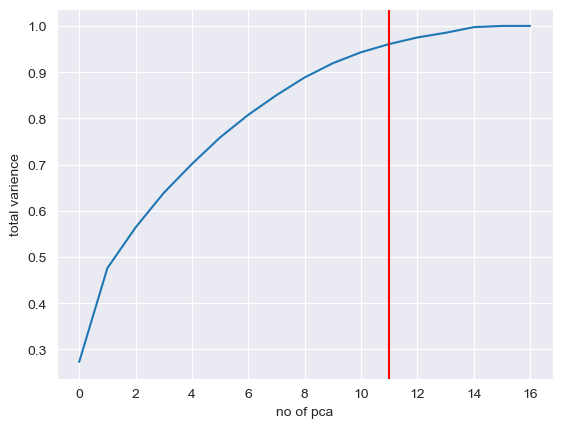

In [9]:
pca_section.plot_explained_variance()